In [1]:
import random
import numpy as np
import sympy
import string
import time
import matplotlib.pyplot as plt


In [2]:
def print_matrix(A, b):
    print("Matrix A:")
    for row in A:
        print(row)
    print("RHS b:\n", b)

def jacobi(A, b, niteraci, x0=None):
    x = x0 if x0 else np.ones(len(A))
    D = np.diag(A)
    R = A - np.diagflat(D)
    for i in range(niteraci):
        x = (b - np.dot(R,x))/D
    return x

def cramer(A, b):
    N = A.shape[1]
    mask = np.broadcast_to(np.diag([1 for i in range(N)]), [N, N, N]).swapaxes(0, 1)
    Ai = np.where(mask, np.repeat(b, N).reshape(N, N), A)
    x = np.linalg.det(Ai) / np.linalg.det(A)
    return x

def generate_random_matrix(n, amin, amax):
    A = np.array([[random.randint(amin, amax) for j in range(n)] for i in range(n)])
    b = np.array([random.randint(amin, amax) for i in range(n)])
    return A, b

In [3]:
osaX=[]
osaY_jacobi=[]
osaY_cramer=[]
jacobi_casy=[]
cramer_casy=[]

icko=0
jecko=0

n=1
maximum_matice=50
pokusy=10

In [4]:

for icko in range(maximum_matice):
  A, b = generate_random_matrix(n, amin=-10, amax=10)
  #print_matrix(A, b)
  osaX.append(n)
  
  for jecko in range(pokusy):
    start = time.time()
    x_iter = jacobi(A, b, 25)
    end = time.time()
    rozdil=(end-start)
    jacobi_casy.append(rozdil)
    start = time.time()
    x_cramer = cramer(A, b)
    end = time.time()
    rozdil=(end-start)
    cramer_casy.append(rozdil)
    jecko+=1

  jacobi_prumer=np.mean(jacobi_casy)*1000
  cramer_prumer=np.mean(cramer_casy)*1000
  icko+=1
  n+=1
  osaY_jacobi.append(jacobi_prumer)
  osaY_cramer.append(cramer_prumer)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [5]:
print("Iterační řešení - časy v milisekundách")
print("Velikost matice: ",osaX)
print("Časy: ",osaY_jacobi)
print("\n###########################\n")
print("Cramerovo řešení - časy v milisekundách")
print("Velikost matice: ",osaX)
print("Časy: ",osaY_cramer)

Iterační řešení - časy v milisekundách
Velikost matice:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Časy:  [1.70440673828125, 1.0846734046936035, 0.8626381556193033, 0.7561683654785156, 0.7075214385986328, 0.7175405820210775, 0.7267270769391742, 0.7104277610778809, 0.7153378592597114, 0.7582211494445801, 0.7505048405040394, 0.8103489875793457, 0.769488628094013, 0.7346647126334054, 0.7060337066650391, 0.6793573498725891, 0.6855389651130228, 0.664859347873264, 0.6467718827097039, 0.6298089027404785, 0.6146885099865141, 0.5989692427895286, 0.5846147951872452, 0.5689382553100586, 0.5560064315795898, 0.5478593019338754, 0.5386970661304615, 0.5312442779541016, 0.5234109944310682, 0.533617337544759, 0.5277395248413086, 0.5210556089878082, 0.514549920053193, 0.5091008018044865, 0.5053036553519114, 0.5013028780619304, 0.4979442905735325, 0.4940421

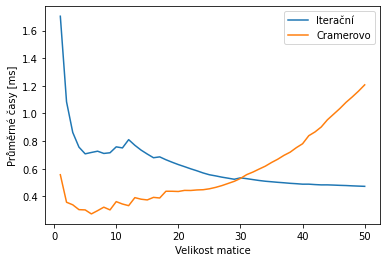

In [6]:
plt.plot(osaX, osaY_jacobi, label="Iterační")
plt.plot(osaX, osaY_cramer, label="Cramerovo")
plt.ylabel('Průměrné časy [ms]')
plt.xlabel('Velikost matice')
plt.legend()
plt.show()